In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('household_power_consumption.txt',sep=';',low_memory=False)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [5]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [8]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [9]:
data.replace('?', np.nan, inplace=True)

In [10]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
DateTime                 0.000000
dtype: float64


In [11]:
data = data.fillna(method='ffill').fillna(method='bfill')


In [12]:
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent)

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
DateTime                 0.0
dtype: float64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [14]:
numeric_cols = ['Global_active_power', 'Global_reactive_power', 
                'Voltage', 'Global_intensity', 
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data[numeric_cols] = data[numeric_cols].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [16]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
dtype: int64

In [17]:
data.shape

(2075259, 8)

In [18]:
data.set_index('DateTime', inplace=True)

In [19]:
hourly_data = data.resample('H').mean()
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [20]:
print(data.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


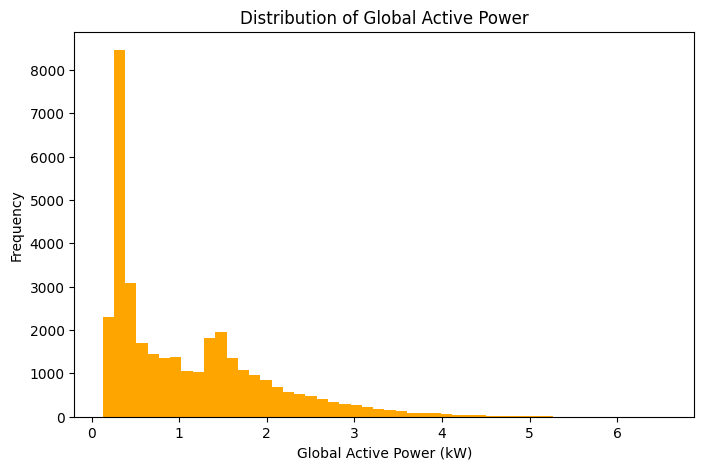

In [21]:
plt.figure(figsize=(8,5))
plt.hist(hourly_data['Global_active_power'], bins=50, color='orange')
plt.title("Distribution of Global Active Power")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequency")
plt.show()

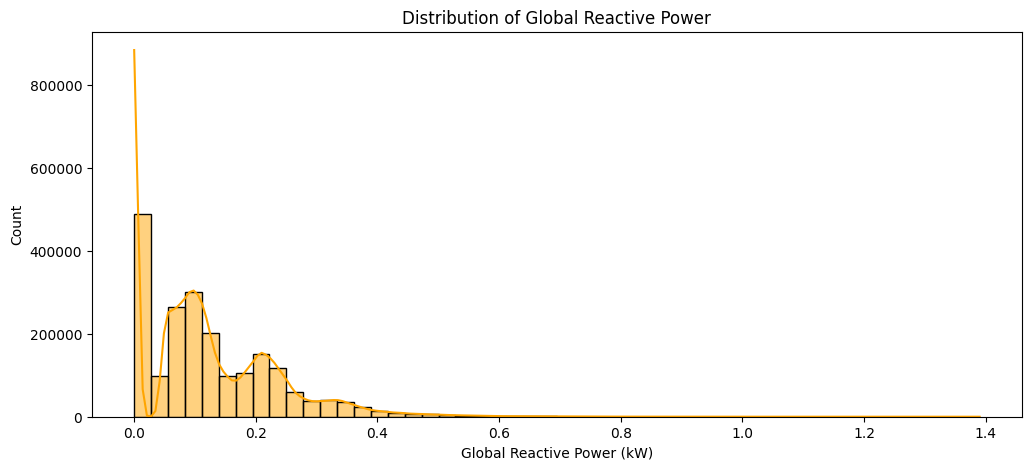

In [22]:
plt.figure(figsize=(12,5))


sns.histplot(data['Global_reactive_power'], bins=50, color='orange', kde=True)
plt.title('Distribution of Global Reactive Power')
plt.xlabel('Global Reactive Power (kW)')


plt.show()

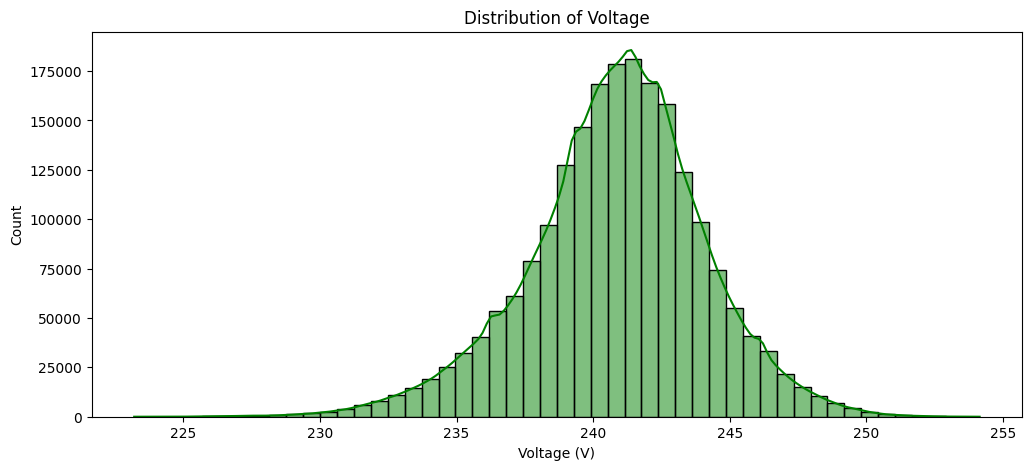

In [23]:
plt.figure(figsize=(12,5))

sns.histplot(data['Voltage'], bins=50, color='green', kde=True)
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (V)')


plt.show()


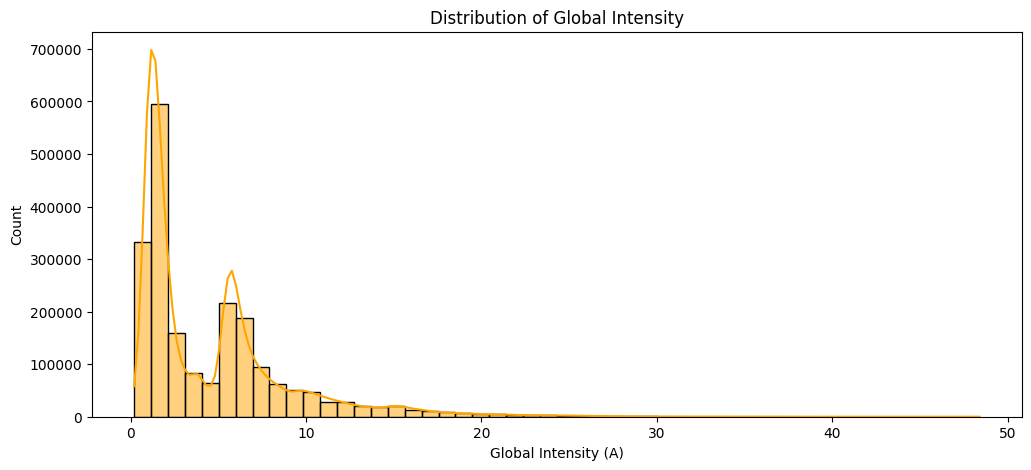

In [24]:
plt.figure(figsize=(12,5))

sns.histplot(data['Global_intensity'], bins=50, color='orange', kde=True)
plt.title('Distribution of Global Intensity')
plt.xlabel('Global Intensity (A)')

plt.show()


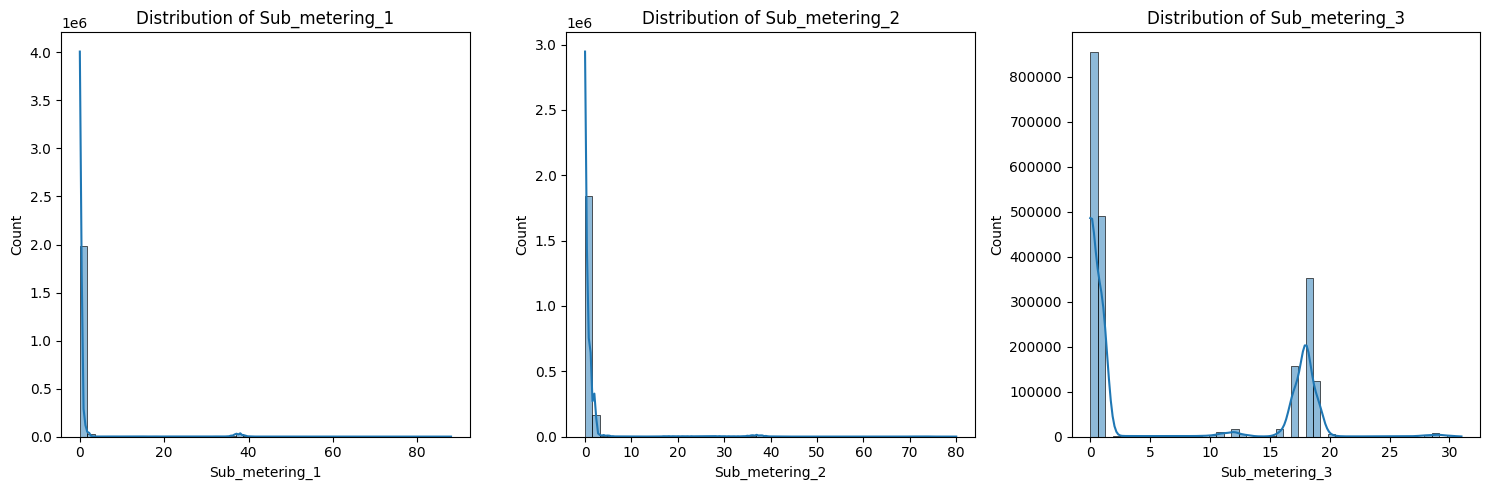

In [25]:
sub_meter_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

plt.figure(figsize=(15,5))
for i, col in enumerate(sub_meter_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


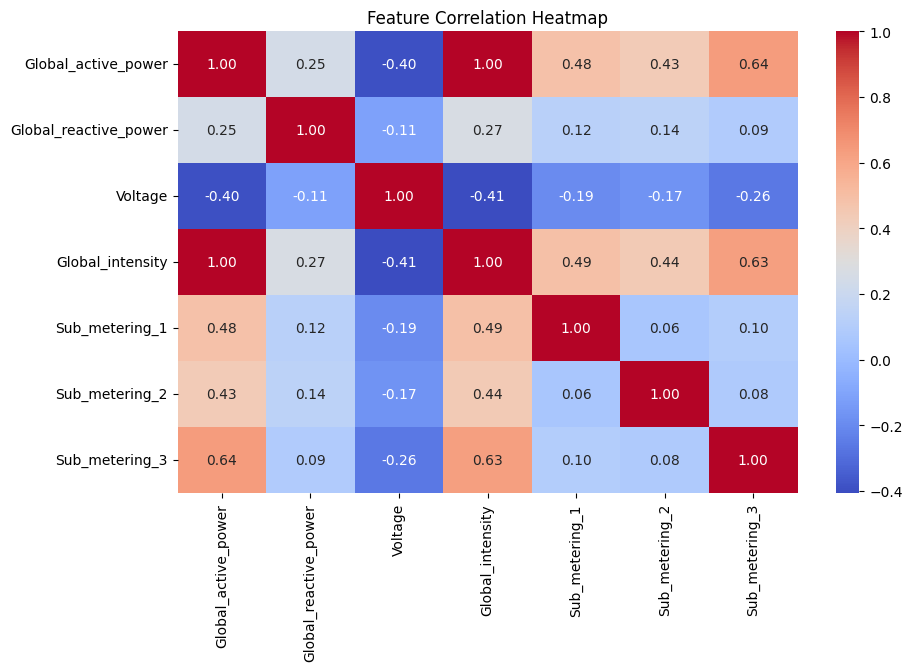

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [27]:
data = data.interpolate(method='time')


In [28]:
data = data.drop(['Sub_metering_1', 'Sub_metering_2','Global_intensity'],axis = 1)

In [29]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3
DateTime,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,17.0


In [30]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [31]:
data['Global_active_power'] = np.log1p(data['Global_active_power'])
data['Global_reactive_power'] = np.log1p(data['Global_reactive_power'])


In [32]:
hourly_data = data.resample('H').mean()


In [33]:
data['hour'] = data.index.hour
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek  # Monday=0, Sunday=6
data['month'] = data.index.month
data['year'] = data.index.year
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)




In [34]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_3,hour,day,day_of_week,month,year,is_weekend
DateTime,,,,,,,,,,
2010-11-26 20:58:00,0.665776,0.0,240.43,0.0,20,26,4,11,2010,0
2010-11-26 20:59:00,0.664748,0.0,240.00,0.0,20,26,4,11,2010,0
2010-11-26 21:00:00,0.661657,0.0,239.82,0.0,21,26,4,11,2010,0
2010-11-26 21:01:00,0.659590,0.0,239.70,0.0,21,26,4,11,2010,0
2010-11-26 21:02:00,0.658556,0.0,239.55,0.0,21,26,4,11,2010,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data.drop('Global_active_power',axis=1)
y = data['Global_active_power']

In [37]:
X

,Global_reactive_power,Voltage,Sub_metering_3,hour,day,day_of_week,month,year,is_weekend
DateTime,,,,,,,,,
2006-12-16 17:24:00,0.349247,234.84,17.0,17,16,5,12,2006,1
2006-12-16 17:25:00,0.361861,233.63,16.0,17,16,5,12,2006,1
2006-12-16 17:26:00,0.404131,233.29,17.0,17,16,5,12,2006,1
2006-12-16 17:27:00,0.406798,233.74,17.0,17,16,5,12,2006,1
2006-12-16 17:28:00,0.423960,235.68,17.0,17,16,5,12,2006,1
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.000000,240.43,0.0,20,26,4,11,2010,0
2010-11-26 20:59:00,0.000000,240.00,0.0,20,26,4,11,2010,0
2010-11-26 21:00:00,0.000000,239.82,0.0,21,26,4,11,2010,0


In [39]:
X.tail()

,Global_reactive_power,Voltage,Sub_metering_3,hour,day,day_of_week,month,year,is_weekend
DateTime,,,,,,,,,
2010-11-26 20:58:00,0.0,240.43,0.0,20,26,4,11,2010,0
2010-11-26 20:59:00,0.0,240.00,0.0,20,26,4,11,2010,0
2010-11-26 21:00:00,0.0,239.82,0.0,21,26,4,11,2010,0
2010-11-26 21:01:00,0.0,239.70,0.0,21,26,4,11,2010,0
2010-11-26 21:02:00,0.0,239.55,0.0,21,26,4,11,2010,0


In [40]:
X.columns

Index(['Global_reactive_power', 'Voltage', 'Sub_metering_3', 'hour', 'day',
       'day_of_week', 'month', 'year', 'is_weekend'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =  scaler.fit_transform(X)

In [42]:
X

array([[ 2.48674778, -1.85488231,  1.25701354, ...,  1.62471606,
        -2.1588099 ,  1.58243741],
       [ 2.61873724, -2.22885002,  1.13824169, ...,  1.62471606,
        -2.1588099 ,  1.58243741],
       [ 3.06103139, -2.33393185,  1.25701354, ...,  1.62471606,
        -2.1588099 ,  1.58243741],
       ...,
       [-1.16766986, -0.31574249, -0.76210791, ...,  1.33195551,
         1.3851639 , -0.63193653],
       [-1.16766986, -0.35283019, -0.76210791, ...,  1.33195551,
         1.3851639 , -0.63193653],
       [-1.16766986, -0.39918983, -0.76210791, ...,  1.33195551,
         1.3851639 , -0.63193653]], shape=(2075259, 9))